In [1]:
# Importing standard libraries
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from matplotlib import pyplot as plt
import re
import matplotlib
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as ens
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix


In [2]:
# reading the smogon.csv from https://www.kaggle.com/datasets/notgibs/smogon-6v6-pokemon-tiers/code?resource=download
df = pd.read_csv('smogon.csv')

# displaying the first 15 rows of the smogon dataset to see if it read correctly
df.head(15)

,X.,Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary,Mega,Tier
0,384,Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,True,AG
1,94,Mega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False,True,Uber
2,115,Mega Kangaskhan,Normal,NaN,590,105,125,100,60,100,100,1,False,True,Uber
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,False,Uber
4,150,Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,True,Uber
5,150,Mega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True,True,Uber
6,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True,False,Uber
7,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,False,Uber
8,257,Blaziken,Fire,Fighting,530,80,120,70,110,70,80,3,False,False,Uber
9,257,Mega Blaziken,Fire,Fighting,630,80,160,80,130,80,100,3,False,True,Uber


In [3]:
# Info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   X.          499 non-null    int64 
 1   Name        499 non-null    object
 2   Type.1      499 non-null    object
 3   Type.2      289 non-null    object
 4   Total       499 non-null    int64 
 5   HP          499 non-null    int64 
 6   Attack      499 non-null    int64 
 7   Defense     499 non-null    int64 
 8   Sp..Atk     499 non-null    int64 
 9   Sp..Def     499 non-null    int64 
 10  Speed       499 non-null    int64 
 11  Generation  499 non-null    int64 
 12  Legendary   499 non-null    bool  
 13  Mega        499 non-null    bool  
 14  Tier        499 non-null    object
dtypes: bool(2), int64(9), object(4)
memory usage: 51.8+ KB


From .head(15) and .info(), we can tell there are 15 column and 499 entries. We can see that for "Type.2" column, we can see that there are 210 null entries. The reason being that not every pokemon does not have a second type. Hence why the value for it is null. We can conclude that "Type.2" most likely does not play a role in Pokemon tier placement because approximately 42% of the data does not have a second type.


From this, we can potentially form these following hypothesis: 

1. The higher the Pokemons' "Total" stat, the more likely they are a higher tier.
2. A legendary pokemon will overall be higher tier than any non-legendary pokemon

In [4]:
# Inbuilt Pandas function of describing the entire dataset

df.describe(include = 'all')

,X.,Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary,Mega,Tier
count,499.000000,499,499,289,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499,499,499
unique,NaN,499,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,11
top,NaN,Lanturn,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,PU
freq,NaN,1,64,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,427,450,179
mean,371.633267,NaN,NaN,NaN,507.717435,79.595190,92.995992,85.460922,86.184369,84.480962,79.000000,3.336673,NaN,NaN,NaN
std,203.728419,NaN,NaN,NaN,83.239471,24.366769,30.556945,30.049624,31.765678,25.198831,28.329955,1.620302,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,236.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,NaN,NaN,NaN
25%,205.500000,NaN,NaN,NaN,460.000000,65.000000,71.000000,65.000000,60.000000,65.500000,58.000000,2.000000,NaN,NaN,NaN
50%,377.000000,NaN,NaN,NaN,497.000000,75.000000,90.000000,80.000000,83.000000,80.000000,80.000000,3.000000,NaN,NaN,NaN
75%,537.500000,NaN,NaN,NaN,540.000000,90.000000,110.000000,100.000000,105.000000,100.000000,100.000000,5.000000,NaN,NaN,NaN


When including all for the describe() function call, there seems to be a lot of nan values for a lot of the rows. This makes sense because the function is trying to describe too many different type of data types in one go. We cannot expect floats to have values that can be entered into the rows, "unique", "top", "and freq". Just like we cannot expect objects to have "mean", "std", "min", "25%", etc. Therefore we need to filter this to make it more legible.

In [5]:
#Using describe() only for object datatypes test edit
df.describe(include = object)

,Name,Type.1,Type.2,Tier
count,499,499,289,499
unique,499,18,18,11
top,Lanturn,Water,Flying,PU
freq,1,64,71,179


From this, we can draw various conclusions about our columns that are the object datatype. 

The conclusions being: 
1) Every Pokemon Name is unique because the count is equal to unique.
2) There are 18 different types in Pokemon and the most common Type.1 is Water because it showed up 64 times. The most common Type.2 is Flying. We must note that describe is not including nulls in this because if it did, Null would've been the top Type.2 because 210 entries out of 499 have null.
3) There are 11 different tiers that a pokemon can be placed in and that the most frequent tier is PU.

In [6]:
# Using describe() for floats

df.describe()

,X.,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,371.633267,507.717435,79.595190,92.995992,85.460922,86.184369,84.480962,79.000000,3.336673
std,203.728419,83.239471,24.366769,30.556945,30.049624,31.765678,25.198831,28.329955,1.620302
min,3.000000,236.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,205.500000,460.000000,65.000000,71.000000,65.000000,60.000000,65.500000,58.000000,2.000000
50%,377.000000,497.000000,75.000000,90.000000,80.000000,83.000000,80.000000,80.000000,3.000000
75%,537.500000,540.000000,90.000000,110.000000,100.000000,105.000000,100.000000,100.000000,5.000000
max,721.000000,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.000000


We can most likely ignore the "X" column because it is just the pokedex number of that specific pokemon. We can also potentially ignore "Generation" but it is not advised because there might be a case where Pokemons in the later generation are higher powered than the ones in the older generation. The opposite case can happen too. We realize that the ranges of some of these columns are extreme. Such as HP having a minimum of '1' and maximum of '255'. This is because there exists a Pokemon that has exactly 1 HP in the game. The developers gave the Pokemon only 1 HP because he would be too strong when factoring his passive abilities.

With that out of the way, we will now begin analyzing the results from the description. 

For the "Total" column, the mean is 508 with a standard deviation of 83. The median being 497 means we can conclude that the values are potentially skewed to the left because of the mean being to the right of the median. The lowest value for "Total" is 236 and the highest being 780.

Then for "HP", the mean is 80 with a standard deviation of 34. The median being 75 means we can conclude that the values are potentially skewed to the left because of the mean being to the right of the median. The lowest value for "HP" is 1 and the highest being 255.

For "Attack", the mean is 93 with a standard deviation of 31. The median being 90 means we can conclude that the values are potentially skewed to the left because of the mean being to the right of the median. The lowest being 5 attack and the highest being 190 attack.

For "Defense", the mean is 85 with a standard deviation of 30. The median is 80 means we can conclude that the values are potentially skewed to the left because of the mean being to the right of the median. The lowest value in this case is 5 and the highest being 190.

The rest of the stats such as "SP..Atk", "SP..Def", and "Speed", we can conclude the same. That means we can conclude that the values are potentially skewed to the left because of the mean being to the right of the median. 

Potentially, the reason why all these columns are skewed to the left because of the early evolutions of some Pokemons bringing down the mean. Or there are some extreme cases such as the Pokemon #291, Shedinja, having only 1 HP.

The interesting column that we were considering ignoring or dropping, "Generation" formed a potentially interesting analysis. Because the mean is 3.3, with the lowest generation being 1 and the highest generation being 6, we can perhaps conclude that there were more pokemons added in the later generations compared to the first 3 generations of pokemon. This could be because of various reasons such as "Mega-Evolutions" being introduced in Generation 6.

array([[<AxesSubplot:title={'center':'X.'}>,
        <AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'HP'}>],
       [<AxesSubplot:title={'center':'Attack'}>,
        <AxesSubplot:title={'center':'Defense'}>,
        <AxesSubplot:title={'center':'Sp..Atk'}>],
       [<AxesSubplot:title={'center':'Sp..Def'}>,
        <AxesSubplot:title={'center':'Speed'}>,
        <AxesSubplot:title={'center':'Generation'}>]], dtype=object)

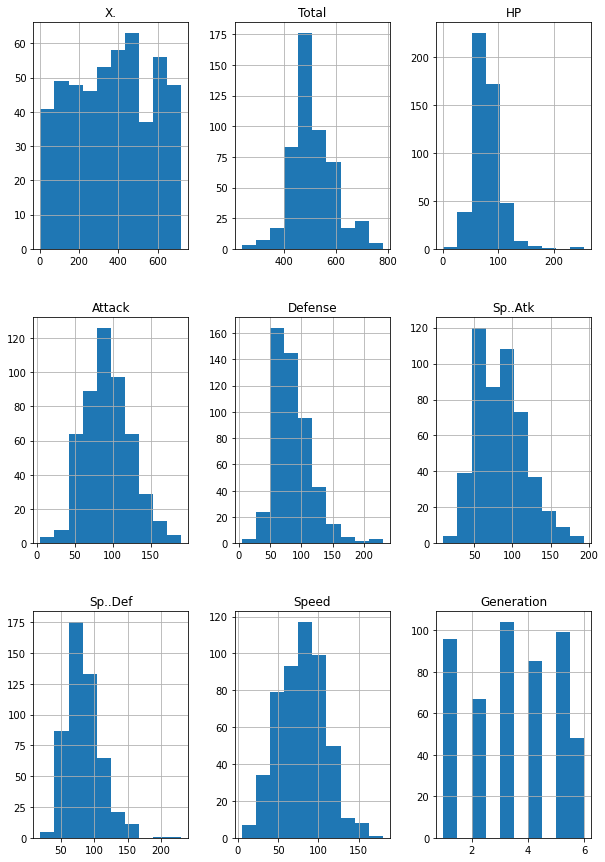

In [7]:
df.hist(figsize = (10,15))

### Exploratory Data Analysis

In [8]:
_deepnote_run_altair(df, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Total","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"COUNT(*)","type":"quantitative","sort":null,"aggregate":"count","scale":{"type":"linear","zero":true}},"color":{"field":"Tier","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

Based on this barchart, we can see that majority of the PU tier pokemon have a stat value of 350 to 500. There are 2 pokemons that are in the PU tier that have a total base stat amount around 670. Majority of the OU and Uber tier pokemons have higher end stats since most of them place around 580 to 700. The OU tiers also have some exceptions to this, such as a OU pokemon have a total base stat count of 405. Because of this, we can most likely assume that total base stat values do seem to play a role in a pokemons tier placement. But we cannot be too sure so we shall do another graph to help validate this assumption.

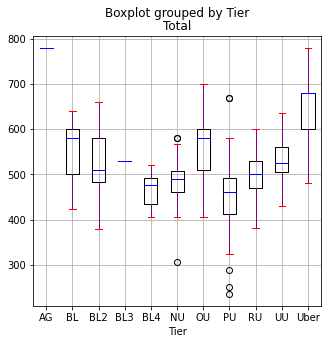

In [9]:
# Plotting the data into a box and whisker plot with x-axis as tiers
# and total as y-axis

# Here is the tierlist order from strongest to weakest
# ['AG', 'Uber', 'OU', 'BL', 'UU', 'BL2','RU', 'BL3', 'NU', 'BL4', 'PU']
boxplotdf = df.filter(items = ['Tier', 'Total'])

boxplotfig = boxplotdf.boxplot(
column = "Total",
by = "Tier",
figsize = (5,5),
color = {
    "boxes": "Black",
    "whiskers": "Purple",
    "medians": "Blue",
    "caps": "Red",}
)


Based on the boxplot, we can see that there are only two tiers that contains outliers, NU and PU. We will decide to ignore AG and BL3 columns because they only contain 1 pokemon. Recall that the tierlist goes in this order: ['AG', 'Uber', 'OU', 'BL', 'UU', 'BL2','RU', 'BL3', 'NU', 'BL4', 'PU']. By following that order, we can see that them seem to follow a trend. The Pokemon in the Uber tier seem to generally higher end total base stats given that approximately 75% of the Pokemon there are well above the lower tiers. Then for OU, you can see that approximately 75% of the Pokemon in the OU tier have less total base stats than the Uber Tier. 

When comparing OU to BL, we can see that they have approximately the same range so that could mean there are other factors that categorize why those pokemons are placed there such as abilities which are not part of this dataset.

For unknown reasons, BL2 has a larger range than UU. But the point being, approximately 75% of the entries in UU tier have less total base stats compared to approximately 50% in the OU tier.



From these two plots, we can see that the first hypothesis, "The higher the Pokemons' 'Total' base stat is, the more likely they are a higher tier." is  most likely true. But because there is significant overlap, we can conclude that total base stats alone do not account for a Pokemons tier placement. 

Now that we have most likely proven our first hypothesis, we wish to now explore the data for the second hypothesis, "Does being a legendary pokemon mean you are automatically placed onto a high tier?"

In [10]:
df['Legendary'].value_counts()

False    427
True      72
Name: Legendary, dtype: int64

In [11]:
_deepnote_run_altair(df, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Legendary","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"COUNT(*)","type":"quantitative","sort":null,"aggregate":"count","scale":{"type":"linear","zero":true}},"color":{"field":"Tier","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

From this graph, we can start to conclude that being a legendary pokemon does somewhat place you into a high tier. From the graph, we can see that majority of the legendary pokemons are in the 'Uber' and 'OU' tiers. But some pokemons that are legendaries, can still be placed into the lower tiers, which are PU and NU. But what if we were to do a find out exactly how many pokemons that are legendary are in each tier? 

In [12]:
df.value_counts(['Legendary', 'Tier'])

Legendary  Tier
False      PU      175
           UU       60
           NU       55
           RU       47
           OU       40
True       Uber     29
False      BL2      18
True       OU       17
False      BL       13
           Uber     10
           BL4       8
True       RU        7
           UU        5
           BL        4
           PU        4
           BL2       3
           NU        2
           AG        1
False      BL3       1
dtype: int64

From this, we can get a much clearer picture. In total, Uber and OU tiers contain 46 out of the 72 Legendary Pokemons in the dataset. Those two tiers alone contain 63% of the legendary pokemons. Based on the fact that there are 72 legendary pokemons out of a 499 entry dataset, and out of those 72 legendary pokemons, 46 of them are part of the 96 Upper Tier Pokemons, we can conclude that being a legendary pokemon does seem to play some role on tier placement. 

array([[<AxesSubplot:title={'center':'AG'}>,
        <AxesSubplot:title={'center':'BL'}>,
        <AxesSubplot:title={'center':'BL2'}>],
       [<AxesSubplot:title={'center':'BL3'}>,
        <AxesSubplot:title={'center':'BL4'}>,
        <AxesSubplot:title={'center':'NU'}>],
       [<AxesSubplot:title={'center':'OU'}>,
        <AxesSubplot:title={'center':'PU'}>,
        <AxesSubplot:title={'center':'RU'}>],
       [<AxesSubplot:title={'center':'UU'}>,
        <AxesSubplot:title={'center':'Uber'}>, <AxesSubplot:>]],
      dtype=object)

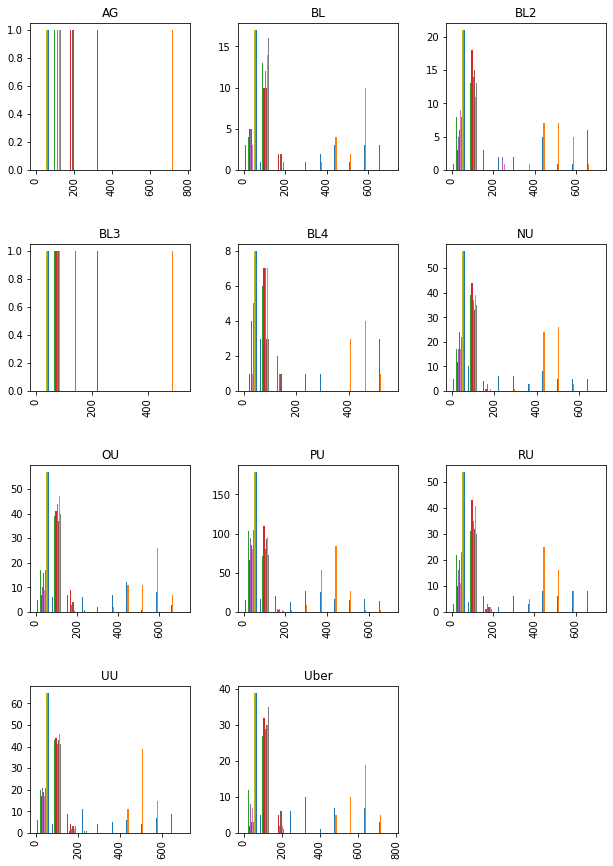

In [13]:
df.hist(by = 'Tier',
figsize = (10,15))

### Methodology

In [14]:
# Here we are splitting the data into features (X) and target (Y)
# (We plan to use a 80% train, and a 20% test)

features = df[["Total","HP", "Attack", "Defense", "Sp..Atk", "Sp..Def", "Speed", "Legendary"]]
features

,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Legendary
0,780,105,180,100,180,100,115,True
1,600,60,65,80,170,95,130,False
2,590,105,125,100,60,100,100,False
3,680,106,110,90,154,90,130,True
4,780,106,190,100,154,100,130,True
...,...,...,...,...,...,...,...,...
494,520,50,65,107,105,107,86,False
495,520,50,65,107,105,107,86,False
496,424,60,59,85,79,105,36,False
497,424,60,79,105,59,85,36,False


In [15]:
# Separating the target from the entire dataset
#target = df({'Tier': ['AG', 'Uber', 'OU', 'BL', 'UU', 'BL2','RU', 'BL3', 'NU', 'BL4', 'PU']})
# Because linear regression doesn't work with strings straight up, we decide to do one hot encoding
#target = df({'Tier': ['AG', 'Uber', 'OU', 'BL', 'UU', 'BL2','RU', 'BL3', 'NU', 'BL4', 'PU']})
target = pd.get_dummies(df["Tier"])
target

,AG,BL,BL2,BL3,BL4,NU,OU,PU,RU,UU,Uber
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
494,0,0,0,0,0,0,0,1,0,0,0
495,0,0,0,0,0,0,0,1,0,0,0
496,0,0,0,0,0,0,0,1,0,0,0
497,0,0,0,0,0,0,0,1,0,0,0


In [16]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)

## Linear Regression



To begin with we are going to use scikit-learn's GridSearchCV to tune our model. Scikit-learn's LinearRegression model takes the following parameters:

    fit_intercept: boolean
    copy_X: boolean
    positive: boolean
    n_jobs: integer

Besides n_jobs, all of the parameters are booleans. So, we will test for them all and parse a short list of integers for n_jobs. The result gives us the ideal hyper parameters for our model.


In [17]:
linear = LinearRegression()

linear_search = GridSearchCV(linear, {
    'fit_intercept':[True, False],
    'copy_X': [True, False],
    'positive': [True, False],
    'n_jobs': [None, 1, 2, 3, 4, 5, 6]
})

linear_search.fit(X_train, y_train)

print(linear_search.best_estimator_)

LinearRegression()


From GridSearchCV, we can assume that the best estimator for our dataset is the default linear regression function with no hyper parameters changed.

In [18]:
linear_model = linear.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_predictions

array([[ 2.68556247e-03,  2.37158542e-02,  5.75351456e-02, ...,
         3.18452724e-02,  1.62708278e-01,  4.80197694e-02],
       [ 9.86432849e-05,  2.50500532e-02,  4.80195515e-02, ...,
         8.49680810e-02,  1.35680944e-01,  2.80824789e-02],
       [ 1.61202656e-03, -9.06544802e-03,  5.32885334e-02, ...,
         5.73542361e-02,  1.33056669e-01,  9.52487527e-03],
       ...,
       [ 1.01248855e-02,  4.64964539e-02,  5.35042508e-02, ...,
         9.80151800e-02,  8.87187049e-02,  3.34894935e-01],
       [ 1.34728690e-03,  5.41062067e-02,  3.82883178e-02, ...,
         1.42495078e-01,  1.46020990e-01,  5.34999877e-02],
       [-3.23186031e-02,  2.91585078e-02, -3.93510208e-02, ...,
         3.34622320e-01,  2.68064366e-01, -2.64270313e-01]])

In [19]:
y_test

,AG,BL,BL2,BL3,BL4,NU,OU,PU,RU,UU,Uber
433,0,0,0,0,0,0,0,1,0,0,0
291,0,0,0,0,0,1,0,0,0,0,0
45,0,0,0,0,0,0,1,0,0,0,0
145,0,0,0,0,0,0,0,0,0,1,0
196,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
343,0,0,0,0,0,0,0,1,0,0,0
86,0,0,0,0,0,0,1,0,0,0,0
53,0,0,0,0,0,0,1,0,0,0,0
64,0,0,0,0,0,0,1,0,0,0,0


In [20]:
print("Score: X_test & y_test: \n", linear_model.score(X_test, y_test))

Score: X_test & y_test: 
 0.04397182796142669


With an accuracy of 0.042, despite using the result from GridSearchCV which gives the best estimating hyper parameters, we can conclude that Linear Regression is not the best model to perform this data analysis with. We can also conclude that it accurately predicts the tier incorrectly.

In [21]:
linear_model.coef_

array([[ 5.25527738e-05, -2.69347036e-05,  1.33739141e-04,
        -5.86805668e-05,  1.32636436e-04, -7.01269772e-05,
        -5.80805549e-05,  4.40462152e-03],
       [ 3.38614750e-04, -1.49996243e-04, -3.08425437e-04,
        -3.98570498e-05, -8.33601012e-05,  1.26480796e-04,
         7.93772784e-04, -3.17173848e-02],
       [ 1.38535087e-04,  1.83900662e-04, -4.87328396e-04,
         8.63406168e-04,  2.82847425e-04, -1.19063496e-03,
         4.86344188e-04, -5.35676786e-03],
       [ 3.06717034e-05, -3.36643078e-05, -4.97037972e-05,
        -2.79254961e-05,  1.32842183e-05,  1.87962992e-06,
         1.26801456e-04, -9.01204142e-03],
       [-1.01875594e-04,  5.17527789e-04,  3.85280861e-05,
         5.16501709e-05,  1.70975066e-04, -4.56884182e-04,
        -4.23672524e-04, -5.84623708e-03],
       [-1.70014298e-05,  5.29807788e-04, -6.28618359e-04,
         5.02594281e-04, -3.59899181e-04, -4.00069023e-04,
         3.39183065e-04, -6.33697706e-02],
       [ 8.96812909e-04,  3.394464

In [22]:
linear_model.intercept_

array([-0.03106668, -0.15881649, -0.03811354, -0.01334837,  0.080016  ,
        0.13417168, -0.41546938,  2.02617453,  0.12362413, -0.35228955,
       -0.35488233])

## Decision Tree



For the random forest, we are going use scikit-learn's RandomForestClassifier. The random forest has more hyper parameters to tune and thus will take much longer to compute. Because of this, we are going to restrict parameters that we pass into our GridSearchCV. The parameters we will be tuning are:

    n_jobs: integer
    max_depth: None, integer
    min_samples_split: integer; at least 2
    min_samples_leaf: integer
    max_features: string



In [23]:
# This is commented now because it would cause the program to run ~10 minutes trying to find the best
# hyper parameters for RandomForestClassifier(). After running it one time, we shouldn't need to run
# it anymore

'''forest_param = GridSearchCV(RandomForestClassifier(), {
    'n_jobs': [1, 2, 3],
    'max_depth': [None, 1, 2],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
})

forest_param.fit(X_train, y_train)

print(forest_param.best_estimator_)'''

"forest_param = GridSearchCV(RandomForestClassifier(), {\n    'n_jobs': [1, 2, 3],\n    'max_depth': [None, 1, 2],\n    'min_samples_split': [2, 3, 4, 5],\n    'min_samples_leaf': [1, 2, 3],\n    'max_features': ['auto', 'sqrt', 'log2']\n})\n\nforest_param.fit(X_train, y_train)\n\nprint(forest_param.best_estimator_)"

Once the GridSearchCV finishes, we learn that the best parameters are:

    max_features: 'log2'
    min_samples_leaf=2
    min_samples_split: 3
    n_jobs: 2


In [24]:
# Decision Tree

forest = RandomForestClassifier(max_features='log2', min_samples_leaf=2, min_samples_split=3, n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', min_samples_leaf=2,
                       min_samples_split=3, n_jobs=2)

In [25]:
#Predict the response for test dataset
forest_predictions = forest.predict(X_test)
forest_predictions

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, forest_predictions))

Accuracy: 0.22


[Text(0.6268939393939394, 0.9666666666666667, 'Attack <= 118.5\ngini = 0.143\nsamples = 247\nvalue = [[399, 0]\n[386, 13]\n[373, 26]\n[399, 0]\n[395, 4]\n[355, 44]\n[358, 41]\n[240, 159]\n[359, 40]\n[355, 44]\n[371, 28]]'),
 Text(0.43127705627705626, 0.9, 'Total <= 503.5\ngini = 0.127\nsamples = 187\nvalue = [[296, 0]\n[286, 10]\n[282, 14]\n[296, 0]\n[292, 4]\n[261, 35]\n[276, 20]\n[145, 151]\n[269, 27]\n[267, 29]\n[290, 6]]'),
 Text(0.27236652236652237, 0.8333333333333334, 'Defense <= 102.5\ngini = 0.092\nsamples = 128\nvalue = [[200, 0]\n[197, 3]\n[192, 8]\n[200, 0]\n[196, 4]\n[172, 28]\n[197, 3]\n[63, 137]\n[187, 13]\n[197, 3]\n[199, 1]]'),
 Text(0.18542568542568544, 0.7666666666666667, 'HP <= 152.5\ngini = 0.082\nsamples = 110\nvalue = [[169, 0]\n[166, 3]\n[162, 7]\n[169, 0]\n[166, 3]\n[152, 17]\n[166, 3]\n[46, 123]\n[158, 11]\n[167, 2]\n[169, 0]]'),
 Text(0.1738816738816739, 0.7, 'Defense <= 56.5\ngini = 0.08\nsamples = 108\nvalue = [[167, 0]\n[164, 3]\n[160, 7]\n[167, 0]\n[164, 3

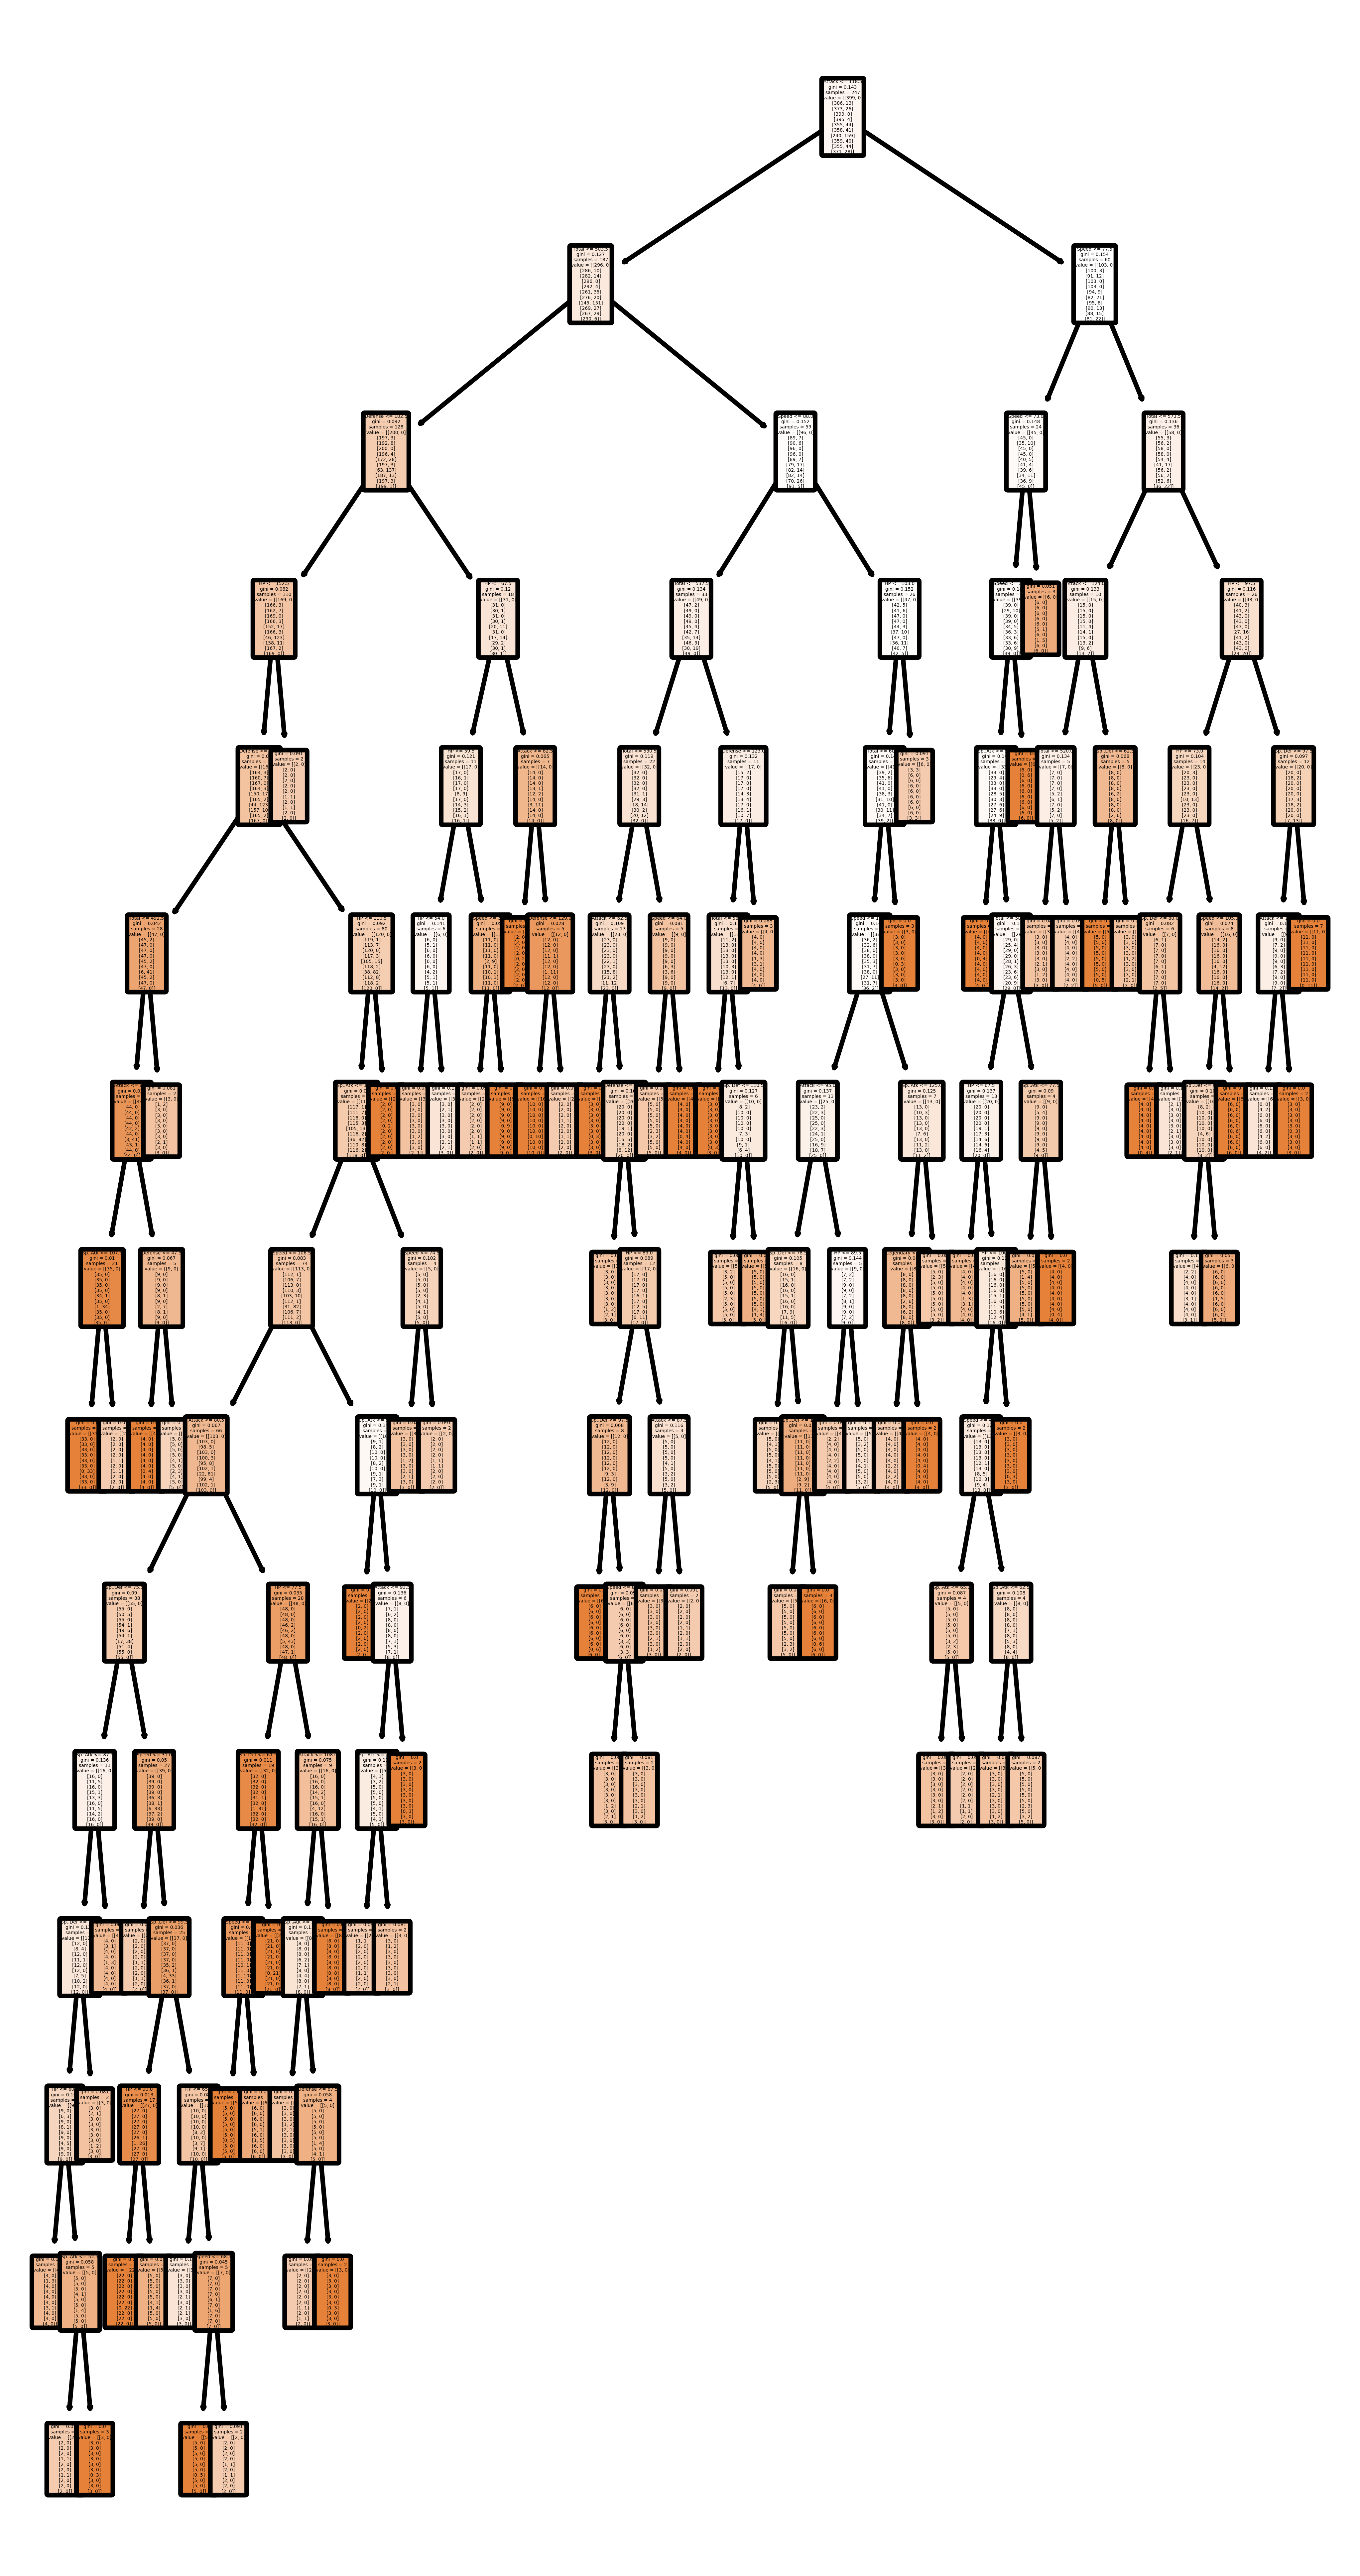

In [27]:
# Visualize the tree
fn = ["Total", "HP","Attack", "Defense", "Sp..Atk", "Sp..Def", "Speed", "Legendary"]
cn = ['AG', 'Uber', 'OU', 'BL', 'UU', 'BL2','RU', 'BL3', 'NU', 'BL4', 'PU']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,10), dpi = 1000)
#fig, axes = plt.subplots(nrows = 1,ncols = 1, dpi=300)

# Plot for the first decision tree in forest
plot_tree(forest[0], 
          feature_names = fn,
          class_names = cn, 
          filled=True, 
          impurity=True, 
          rounded=True)

## Polynomial Regression

In [28]:
# Use sklearn to train a model on the training set
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
poly = poly_reg.fit(X_poly,y_train)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y_train)
print("Coefficients: \n", lin_reg2.coef_)
print("Intercept: \n", lin_reg2.intercept_)
scores = cross_val_score(lin_reg2, X_train, y_train, cv=30)
scores

Coefficients: 
 [[ 3.37406627e-13 -8.50632949e-06  4.91382594e-04 -1.74492492e-03
   1.07256913e-03 -1.72274950e-03  1.35435431e-03  5.40862057e-04
  -1.32705142e-01 -7.41908832e-09 -5.83974363e-07  2.59424931e-06
  -1.89491115e-06  2.48309258e-06 -1.82219153e-06 -7.83694960e-07
   3.70784651e-04 -1.85922918e-06  1.86952256e-06 -4.14835509e-06
   2.25718075e-06  9.02499719e-07  3.94408796e-07 -3.87487312e-04
   1.69317458e-06  3.58609574e-07  2.98305716e-06 -2.52411898e-06
  -1.78599669e-06  9.13607510e-05 -6.48563999e-09  2.74826821e-08
   2.06442147e-06 -1.90586933e-07  4.36672677e-04  2.61527283e-06
  -3.17375276e-06 -2.22614610e-06 -2.13634471e-04 -3.57820816e-06
   4.48696722e-06  2.69267008e-05 -1.46234143e-06  4.16946305e-04
  -1.32705142e-01]
 [-1.32169390e-12 -1.86572251e-03  5.75532168e-03 -1.62705238e-03
   2.86451251e-03  2.54042924e-03 -6.49618942e-03 -4.90274414e-03
   5.19203276e-01  1.91795076e-06 -9.03939237e-06  6.41552306e-07
  -4.04815244e-06 -6.42887247e-06  1.1323

array([ 0.03894797,  0.00361311,  0.05956267, -0.12078995,  0.037604  ,
        0.02225032,  0.00368599,  0.05960275, -0.00351818,  0.04580231,
        0.02845764, -0.0231607 , -0.01423682, -0.04705713,  0.02558487,
        0.02703819,  0.04177761,  0.07113343,  0.03937371,  0.04789385,
       -0.04609762,  0.00724074,  0.04183183,  0.01726906, -0.04571407,
        0.03234484,  0.01342159,  0.06991758,  0.01783592,  0.05122103])

In [29]:
model3 = ens.RandomForestRegressor(n_estimators=15, max_depth=50, max_features='auto')
model3.fit(X_train, y_train)

train_rmse = np.mean(np.sqrt(mean_squared_error(y_train, model3.predict(X_train))))
cv_rmse = np.mean(np.sqrt(-cross_val_score(model3, X_train, y_train, cv=10, scoring='neg_mean_squared_error')))
print('Train Error: {}'.format(train_rmse))
print('CV Error:    {}'.format(cv_rmse))

Train Error: 0.11120019304492094
CV Error:    0.26134741966598085


In [30]:
# Preprocessing the data to perform confusion matrix in later models.
SVCRavel = np.ravel(df['Tier'])
SVCRavel

array(['AG', 'Uber', 'Uber', 'Uber', 'Uber', 'Uber', 'Uber', 'Uber',
       'Uber', 'Uber', 'Uber', 'Uber', 'Uber', 'Uber', 'Uber', 'Uber',
       'Uber', 'Uber', 'Uber', 'Uber', 'Uber', 'Uber', 'Uber', 'Uber',
       'Uber', 'Uber', 'Uber', 'Uber', 'Uber', 'Uber', 'Uber', 'Uber',
       'Uber', 'Uber', 'Uber', 'Uber', 'Uber', 'Uber', 'Uber', 'Uber',
       'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU',
       'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU',
       'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU',
       'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU',
       'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU',
       'OU', 'OU', 'BL', 'BL', 'BL', 'BL', 'BL', 'BL', 'BL', 'BL', 'BL',
       'BL', 'BL', 'BL', 'BL', 'BL', 'BL', 'BL', 'BL', 'UU', 'UU', 'UU',
       'UU', 'UU', 'UU', 'UU', 'UU', 'UU', 'UU', 'UU', 'UU', 'UU', 'UU',
       'UU', 'UU', 'UU', 'UU', 'UU', 'UU', 'UU', 'UU', 'UU', 'U

In [31]:
# Splitting the data into 80-20 split with newly preprocessed targets to handle confusion matrix 
# call in future models
Xx_train, Xx_test, yy_train, yy_test = train_test_split(features, SVCRavel, test_size = 0.2, random_state=3)

## K-Nearest Neighbors

Score X & y: 
 0.9874686716791979
Score: X_test & y_test: 
 0.37
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


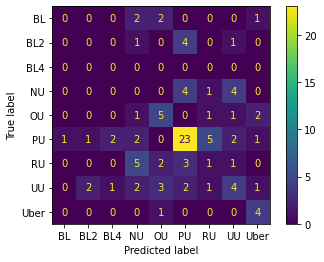

In [32]:
# k-Neighbors Classifier with only 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1) #Create a Neural Network (MLP Classifier)
knn.fit(Xx_train, yy_train) #Load the test data into the model

# Report on the score for kNN with 1 neighbor
print("Score X & y: \n", knn.score(Xx_train, yy_train)) 
print("Score: X_test & y_test: \n", knn.score(Xx_test, yy_test))

plot_confusion_matrix(knn, Xx_test, yy_test) 

Score X & y: 
 0.9899749373433584
Score: X_test & y_test: 
 0.4
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


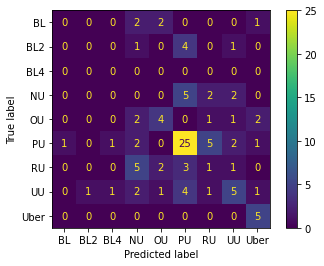

In [33]:
# Use sklearn to 'train' a k-Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3, weights = "distance") #Create a Neural Network (MLP Classifier)
knn.fit(Xx_train, yy_train) #Load the test data into the model

# Report on the score for kNN with 1 neighbor and weights = "distance"
print("Score X & y: \n", knn.score(Xx_train, yy_train)) 
print("Score: X_test & y_test: \n", knn.score(Xx_test, yy_test))

plot_confusion_matrix(knn, Xx_test, yy_test) 


Score X & y: 
 0.6466165413533834
Score: X_test & y_test: 
 0.34
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


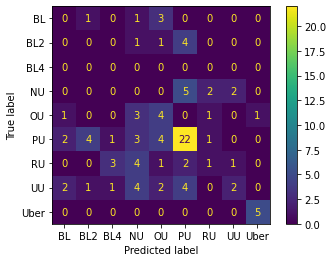

In [34]:
# Use sklearn to 'train' a k-Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3) #Create a Neural Network (MLP Classifier)
knn.fit(Xx_train, yy_train) #Load the test data into the model

# Report on the score for kNN with 3 neighbors
print("Score X & y: \n", knn.score(Xx_train, yy_train)) 
print("Score: X_test & y_test: \n", knn.score(Xx_test, yy_test))

plot_confusion_matrix(knn, Xx_test, yy_test) 


From the above information we can see that the various k-neighbors classifier (kNN) classifiers predicts the correct Pokemon Tier with a relatively high accuracy for the training data and around 34% for the testing data. These numbers are provided by getting the score of the classifier. This means it is most likely overfitted.

In the confusion matrix we can see this data visualized. If we look closely we can see that the labels for the predicted and the true value match up in a diagonal pattern from the upper left corner to the bottom right corner. This means that everything that is on this specific diagonal line is correctly predicted and everything outside this line is the data that was incorrectly predicted.

## MLP Classifier

Object `measure` not found.
Score X & y: 
 0.41102756892230574
Score: X_test & y_test: 
 0.36
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


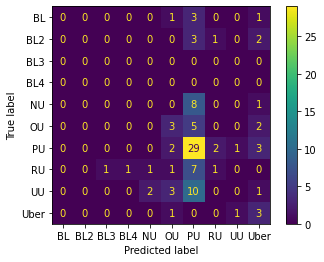

In [35]:
mlp = MLPClassifier(random_state=7, max_iter=1000) #Create a Neural Network (MLP Classifier)
mlp.fit(Xx_train, yy_train) #Train the model using the training sets

Report on the score for the Neural Network, what does the score measure?
print("Score X & y: \n", mlp.score(Xx_train, yy_train)) 
print("Score: X_test & y_test: \n", mlp.score(Xx_test, yy_test))

plot_confusion_matrix(mlp, Xx_test, yy_test)  


From the above information we can see that the Multi-layer Perceptron (MLP) classifier predicts the correct Pokemon Tier with an accuracy of around 42% for the training data, and around 36% for the testing data. After multiple "trial and error" methods, we saw that the highest predicted results were provided by setting the max iterations to 1000 (any more would not make a difference), and setting the random state to 7 which was the median of results that were produced. These numbers are provided by getting the score of the classifier. 

In the confusion matrix we can see this data visualized. If we look closely we can see that the labels for the predicted and the true value match up in a diagonal pattern from the upper left corner to the bottom right corner. This means that everything that is on this specific diagonal line is correctly predicted and everything outside this line is the data that was incorrectly predicted.

## SVC Classifier

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
Score X & y: 
 0.43358395989974935
Score: X_test & y_test: 
 0.43


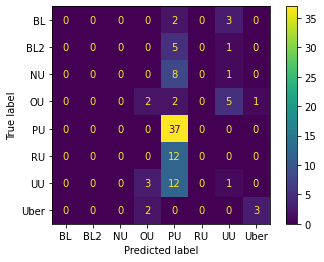

In [36]:
# Split dataset into training set and test set
Xx_train, Xx_test, yy_train, yy_test = train_test_split(features, SVCRavel, test_size = 0.2, random_state=3)
clf = svm.SVC().fit(Xx_train, yy_train)

plot_confusion_matrix(clf, Xx_test, yy_test)  

print("Score X & y: \n", clf.score(Xx_train, yy_train)) 
print("Score: X_test & y_test: \n", clf.score(Xx_test, yy_test))

plt.show()

From the above information we can see that the Support vector machine (SVC) classifier predicts the correct Pokemon Tier with an accuracy of around 43% for both the testing and the training data. These numbers are provided by getting the score of the classifier. 

In the confusion matrix we can see this data visualized. If we look closely we can see that the labels for the predicted and the true value match up in a diagonal pattern from the upper left corner to the bottom right corner. This means that everything that is on this specific diagonal line is correctly predicted and everything outside this line is the data that was incorrectly predicted.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1b7fde91-df8e-46b5-9c8c-8f7e7801ecdc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>